In [314]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [309]:
#Reading the file(downloaded from covid19india.org)
df = pd.read_csv('case_time_series_26.csv')
df.head()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0


In [310]:
#To avoid outliers
pop = df[['Date', 'Daily Confirmed', 'Total Confirmed', 'Daily Deceased', 'Total Deceased']][62:]

In [311]:
pop['CFR'] = (pop['Daily Deceased']/pop['Daily Confirmed'])*100 #Calculating Case Fatality Rate
pop.head()

,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
62,1 April 2020,424,2059,6,53,1.415094
63,2 April 2020,486,2545,16,69,3.292181
64,3 April 2020,560,3105,14,83,2.500000
65,4 April 2020,579,3684,13,96,2.245250
66,5 April 2020,609,4293,22,118,3.612479


In [312]:
df[452:]['Total Deceased']/df[452:]['Total Confirmed']*100

452    1.11932
dtype: float64

In [313]:
pop['CFR'][pop['CFR']>17.5] #removing Outliers

138    18.076854
Name: CFR, dtype: float64

In [315]:
pop['CFR'][pop['CFR']>17.5] = float(df[452:]['Total Deceased']/df[452:]['Total Confirmed']*100)

In [316]:
import statistics #Mean and Standard Deviation
print('Population Mean = '+str(statistics.mean(pop['CFR'])))
mu_pop = statistics.mean(pop['CFR'])
#print('Phase1 Standard Deviation = '+str(statistics.stdev(pop['CFR'])))

Population Mean = 1.572668013155459


# Phase 1

In [322]:
df1 = pop[0:183] #extracting from 1st April, 2020 to 30th September, 2020
df1 =  df1.reset_index()
df1.head()

,index,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
0,62,1 April 2020,424,2059,6,53,1.415094
1,63,2 April 2020,486,2545,16,69,3.292181
2,64,3 April 2020,560,3105,14,83,2.500000
3,65,4 April 2020,579,3684,13,96,2.245250
4,66,5 April 2020,609,4293,22,118,3.612479


In [318]:
import statistics #Mean and Standard Deviation
print('Phase1 Mean = '+str(statistics.mean(df1['CFR'])))
print('Phase1 Standard Deviation = '+str(statistics.stdev(df1['CFR'])))

Phase1 Mean = 2.219044620149545
Phase1 Standard Deviation = 0.9433562605454509


Scatter plot for CFR time series data

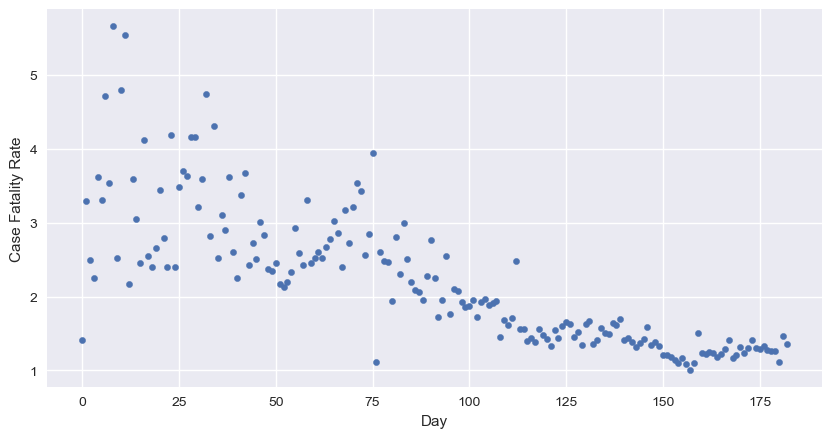

In [393]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns



mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.scatter(df1.index, df1['CFR'], s=20)
plt.xlabel("Day")
plt.ylabel("Case Fatality Rate")
plt.show()



Histogram

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

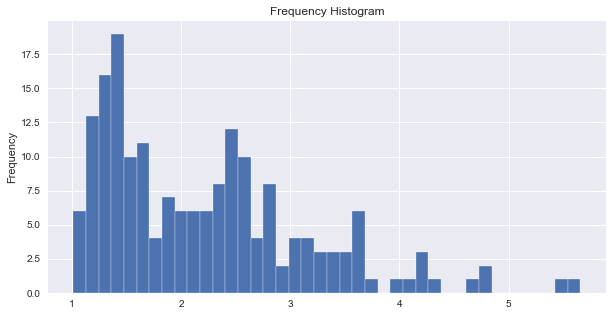

In [392]:
%matplotlib inline
mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.rcParams.update({'figure.figsize':(10, 4), 'figure.dpi':100})

plt.hist(df1['CFR'], bins=40)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')




# Phase 2(October - Feb)

In [345]:
df2 = pop[183:334] #Extracting from 1st October, 2020 to 30th January, 2021
df2 = df2.reset_index()
df2.head()

,index,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
0,245,1 October 2020,81784,6392060,1099,99221,1.343784
1,246,2 October 2020,79883,6471943,1068,100289,1.336955
2,247,3 October 2020,75479,6547422,937,101226,1.241405
3,248,4 October 2020,74770,6622192,903,102129,1.207704
4,249,5 October 2020,60130,6682322,886,103015,1.473474


In [346]:
print('Phase2 mean = '+str(statistics.mean(df2['CFR'])))
print('Phase2 Standard Deviation = '+str(statistics.stdev(df2['CFR'])))

Phase2 mean = 1.1663602438452223
Phase2 Standard Deviation = 0.23878407743069166


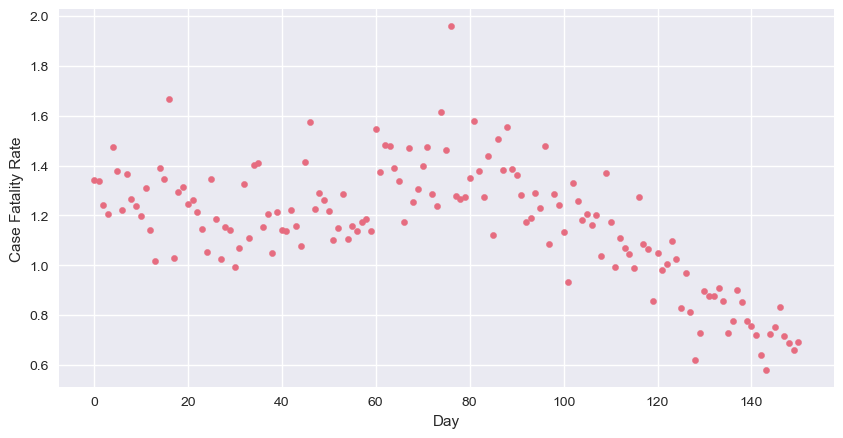

In [395]:
import matplotlib.pyplot as plt
mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.scatter(df2.index, df2['CFR'], s=20, c='#e66c80')
plt.xlabel("Day")
plt.ylabel("Case Fatality Rate")
plt.show()



[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

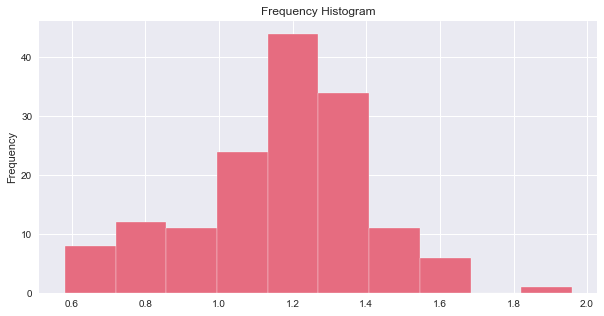

In [328]:
%matplotlib inline
mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.rcParams.update({'figure.figsize':(10, 5), 'figure.dpi':100})

plt.hist(df2['CFR'], bins=10, color = "#e66c80")
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

# Phase 3 (March - till Date)

In [348]:
df3 = pop[334:] #Extracting from 1st February, 2021 till date
df3 = df3.reset_index()
df3.head()

,index,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
0,396,1 March 2021,12270,11124248,92,156695,0.749796
1,397,2 March 2021,14998,11139246,98,156793,0.653420
2,398,3 March 2021,17425,11156671,87,156880,0.499283
3,399,4 March 2021,16824,11173495,113,156993,0.671660
4,400,5 March 2021,18324,11191819,109,157102,0.594848


In [349]:
print('Phase3 mean = '+str(statistics.mean(df3['CFR'])))
print('Phase3 Standard Deviation = '+str(statistics.stdev(df3['CFR'])))

Phase3 mean = 0.5738180848384073
Phase3 Standard Deviation = 0.10805766190798674


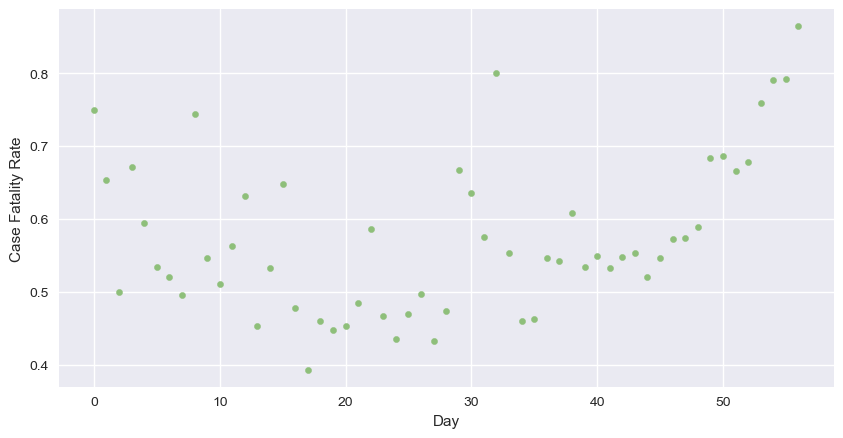

In [365]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(df3.index, df3['CFR'], s=20, c='#8ebf7a')
plt.xlabel("Day")
plt.ylabel("Case Fatality Rate")
plt.show()

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

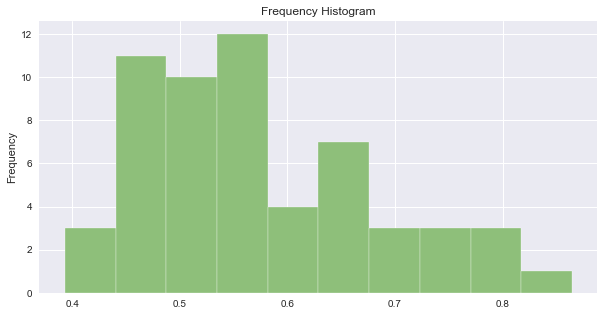

In [364]:
%matplotlib inline
mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.rcParams.update({'figure.figsize':(10, 5), 'figure.dpi':100})

plt.hist(df3['CFR'], bins=10, color = "#8ebf7a")
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

# z - test

Testing Phase 1 against the Population Mean

In [335]:
#z-test
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest
  
# Generate a random array of 50 numbers having mean 110 and sd 15
# similar to the IQ scores data we assume above
mean_iq = statistics.mean(df1['CFR'])
sd_iq = statistics.stdev(df1['CFR'])/math.sqrt(len(df1['CFR']))
alpha =0.05
null_mean = mu_pop
data = sd_iq*randn(len(df1['CFR']))+mean_iq
# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
  
# now we perform the test. In this function, we passed data, in value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger
  
ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

mean=2.23 stdv=0.08
Reject Null Hypothesis


Testing Phase 2 against the Population Mean

In [336]:
mean_iq = statistics.mean(df2['CFR'])
sd_iq = statistics.stdev(df2['CFR'])/math.sqrt(len(df2['CFR']))
alpha =0.05
null_mean = mu_pop
data = sd_iq*randn(len(df2['CFR']))+mean_iq
# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
  
# now we perform the test. In this function, we passed data, in value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger
  
ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Accept NUll Hypothesis")

mean=1.17 stdv=0.02
Accept NUll Hypothesis


Testing Phase 3 against the Population Mean

In [337]:
mean_iq = statistics.mean(df3['CFR'])
sd_iq = statistics.stdev(df3['CFR'])/math.sqrt(len(df3['CFR']))
alpha =0.05
null_mean = mu_pop
data = sd_iq*randn(len(df3['CFR']))+mean_iq
# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
  
# now we perform the test. In this function, we passed data, in value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger
  
ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Accept NUll Hypothesis")

mean=0.58 stdv=0.01
Accept NUll Hypothesis


# Two Sample z-test

Phase 2 against Phase 1

In [338]:
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(df2['CFR'], x2=df1['CFR'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.0287970247265223e-40
reject null hypothesis


Phase 3 against Phase 1

In [339]:
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(df3['CFR'], x2=df1['CFR'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.478068233595394e-39
reject null hypothesis


Phase 3 against Phase 2

In [340]:
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(df3['CFR'], x2=df2['CFR'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.1305802244312386e-72
reject null hypothesis


Visualizing all the Distributions

In [396]:
time1 = pop['CFR'].to_frame()
time2 = df1['CFR'].to_frame()
time3 = df2['CFR'].to_frame()
time4 = df3['CFR'].to_frame()

In [397]:
time1["Data"] = "Overall"
time2["Data"] = "Dawn"
time3["Data"] = "Calm"
time4["Data"] = "Storm"

In [398]:
times = [time1, time2, time3, time4]
allTimes = pd.concat(times)

In [399]:
result = pd.concat(times)
#result

In [290]:
import seaborn as sns
sns.set_theme(style="whitegrid")

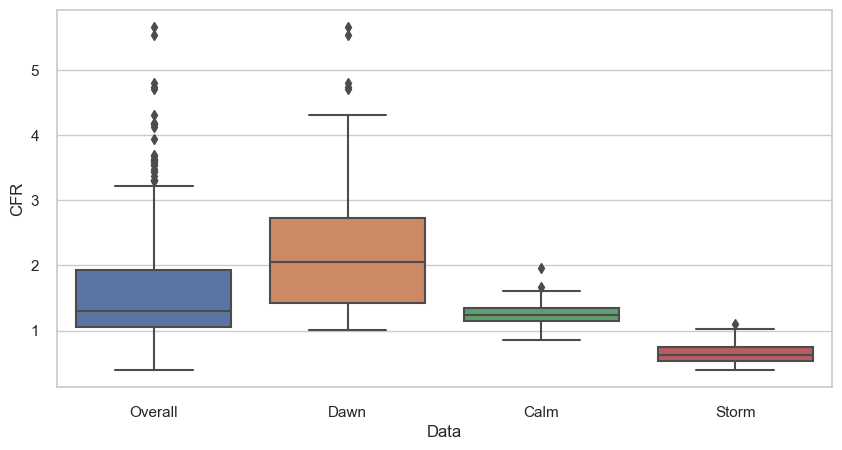

In [291]:
ax = sns.boxplot(x="Data", y="CFR", data=result)

# Analysing Last 4 weeks

In [351]:
last_month = df3['CFR'][-28:] #Extracting last 4 week's data

In [352]:
last_month_data = df3[-28:]

In [353]:
last_month_data = last_month_data.reset_index()
last_month_data.head()

,level_0,index,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
0,29,425,30 March 2021,53237,12148521,355,161911,0.666829
1,30,426,31 March 2021,72113,12220634,458,162369,0.635114
2,31,427,1 April 2021,81398,12302032,468,162837,0.574953
3,32,428,2 April 2021,89023,12391055,713,163550,0.800917
4,33,429,3 April 2021,92994,12484049,514,164064,0.552724


In [354]:
last_month_data = last_month_data.rename(columns={"level_0": "X"})
last_month_data.head()

,X,index,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
0,29,425,30 March 2021,53237,12148521,355,161911,0.666829
1,30,426,31 March 2021,72113,12220634,458,162369,0.635114
2,31,427,1 April 2021,81398,12302032,468,162837,0.574953
3,32,428,2 April 2021,89023,12391055,713,163550,0.800917
4,33,429,3 April 2021,92994,12484049,514,164064,0.552724


In [149]:
last_month_data.to_csv('last_month.csv')

One Sample T-test (against Population Mean)

In [355]:
from scipy.stats import ttest_1samp
tscore, pvalue = ttest_1samp(last_month, popmean=mu_pop)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)

t Statistic:  -47.4354621442257
P Value:  1.5252515175502669e-27


Reject Null Hypothesis

# Results

1. Phase 1 vs Population - Reject Null Hypothesis 
2. Phase 2 vs Population - Accept Null Hypothesis
3. Phase 3 vs Population - Accept Null Hypothesis
4. Phase 1 vs Phase 2 - Reject Null Hypothesis
5. Phase 1 vs Phase 3 - Reject Null Hypothesis
6. Phase 2 vs Phase 3 - Reject Null Hypothesis
7. Last 28 days vs Population - Reject Null Hypothesis (t-test)

# SIR Model

In [151]:
from astropy import modeling

In [152]:
x=last_month_data['X']

# Predicting Cases

In [400]:
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D()   # depending on the data you need to give some initial values
fitted_model = fitter(model, x, last_month_data['Daily Confirmed'])

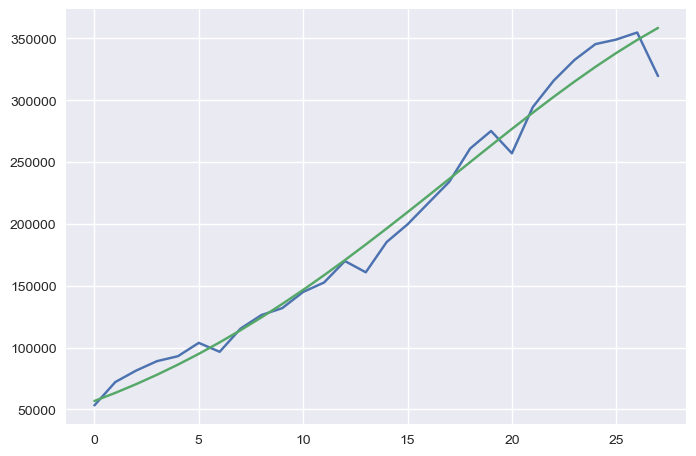

In [401]:
plt.plot(x, last_month_data['Daily Confirmed'])
plt.plot(x, fitted_model(x))

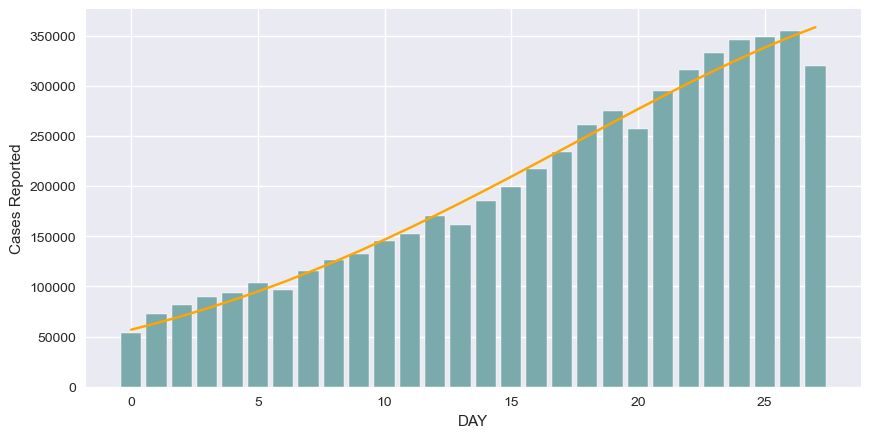

In [402]:
plt.figure(figsize=(10,5))
plt.xlabel('DAY') 
plt.ylabel('Cases Reported') 
plt.bar(x, last_month_data['Daily Confirmed'], color ='#7baaad')
plt.plot(x, fitted_model(x), color ='orange')

In [403]:
l = [i for i in range(0, 35)]
l = pd.Series(l)

Next week forecasts for Daily Cases

In [405]:
#forecasts
fitted_model(l)[-7:]

array([367247.16746964, 375154.89015107, 382036.34681742, 387829.34770764,
       392480.9397012 , 395948.21203254, 398198.95530315])

In [408]:
n=1
for i in fitted_model(l)[-7:]:
    print('Day '+str(n)+': '+str(i))
    n=n+1

Day 1: 367247.1674696417
Day 2: 375154.89015107206
Day 3: 382036.3468174187
Day 4: 387829.34770764067
Day 5: 392480.93970120064
Day 6: 395948.21203253954
Day 7: 398198.95530315384


# Predicting Deaths

In [409]:
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D()   # depending on the data you need to give some initial values
fitted_model = fitter(model, x, last_month_data['Daily Deceased'])

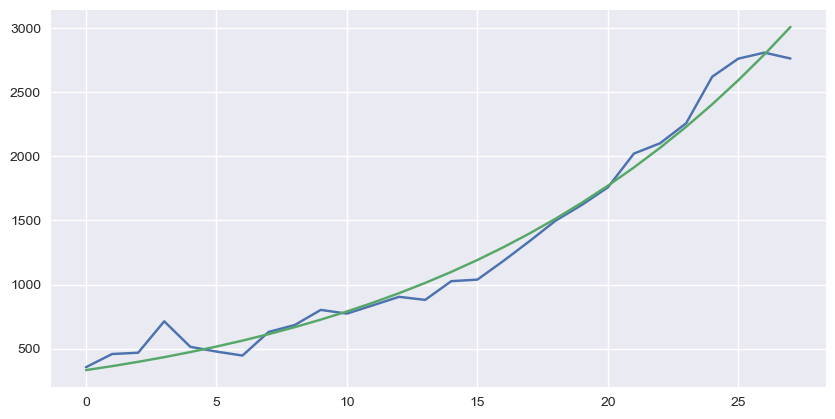

In [410]:
plt.figure(figsize=(10,5))
plt.plot(x, last_month_data['Daily Deceased'])
plt.plot(x, fitted_model(x))

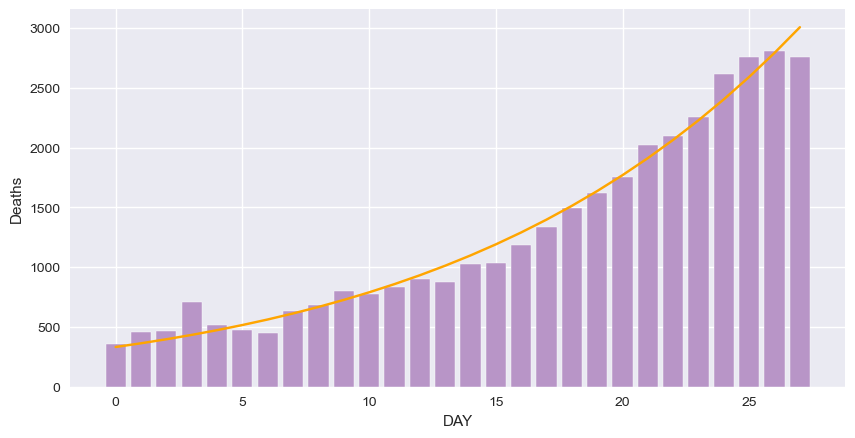

In [411]:
plt.figure(figsize=(10,5))
plt.xlabel('DAY') 
plt.ylabel('Deaths') 
plt.bar(x, last_month_data['Daily Deceased'], color ='#b895c7')
plt.plot(x, fitted_model(x), color ='orange')

Daily Deaths Forecast for next week

In [412]:
n=1
for i in fitted_model(l)[-7:]:
    print('Day '+str(n)+': '+str(i))
    n=n+1

Day 1: 3237.4536560872666
Day 2: 3482.092763145873
Day 3: 3743.0382958975697
Day 4: 4021.1971128000773
Day 5: 4317.512575848549
Day 6: 4632.964986229754
Day 7: 4968.571940807789
